# Initialization

Here we initialize the imports

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline

# Code

In [34]:
dataset = pd.read_csv('./diabetes.csv', delimiter=",")

Text(0.5,1,'Correlation between different fearures')

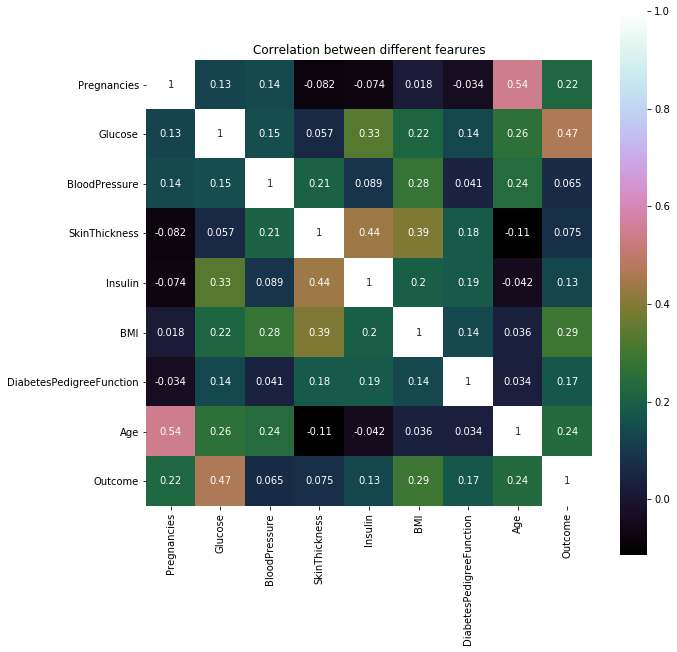

In [35]:
import seaborn as sns

df=dataset
dataset.shape

correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [53]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [54]:
#here we read the data where X is the input and Y is the output
from keras.utils import to_categorical

length = len(dataset.values)
width = dataset.ndim-1
ratio = int(length*0.8) #training ratio (includes validation) vs test ratio 

x_train = dataset.values[0:ratio,0:width]
y_train = dataset.values[0:ratio:,width]

x_test = dataset.values[ratio:,0:width]
y_test = dataset.values[ratio:,width]

print (y_train)

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

#checking lengths
print(len(x_train))
print(len(x_test))
print(len(x_train)+len(x_test))

print (y_train)
print(y_train.shape, y_test.shape)

#scatterplots
#plt.scatter(creditcard.Class, creditcard.V2, color='red')
#plt.scatter(creditcard.Class, creditcard.V5, color='blue')

[ 148.   85.  183.   89.  137.  116.   78.  115.  197.  125.  110.  168.
  139.  189.  166.  100.  118.  107.  103.  115.  126.   99.  196.  119.
  143.  125.  147.   97.  145.  117.  109.  158.   88.   92.  122.  103.
  138.  102.   90.  111.  180.  133.  106.  171.  159.  180.  146.   71.
  103.  105.  103.  101.   88.  176.  150.   73.  187.  100.  146.  105.
   84.  133.   44.  141.  114.   99.  109.  109.   95.  146.  100.  139.
  126.  129.   79.    0.   62.   95.  131.  112.  113.   74.   83.  101.
  137.  110.  106.  100.  136.  107.   80.  123.   81.  134.  142.  144.
   92.   71.   93.  122.  163.  151.  125.   81.   85.  126.   96.  144.
   83.   95.  171.  155.   89.   76.  160.  146.  124.   78.   97.   99.
  162.  111.  107.  132.  113.   88.  120.  118.  117.  105.  173.  122.
  170.   84.   96.  125.  100.   93.  129.  105.  128.  106.  108.  108.
  154.  102.   57.  106.  147.   90.  136.  114.  156.  153.  188.  152.
   99.  109.   88.  163.  151.  102.  114.  100.  1

In [75]:
#here we create the model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

model = Sequential()
#layers
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


optimizer = Adam(lr=0.1) # lr is the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [76]:
#here we train the model
model.fit(x_train, y_train, epochs=15, batch_size=10);

Epoch 1/15
614/614 [==============================] - 1s 1ms/step - loss: -1799.5181 - acc: 0.0000e+00
Epoch 2/15
614/614 [==============================] - 0s 181us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 3/15
614/614 [==============================] - 0s 181us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 4/15
614/614 [==============================] - 0s 189us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 5/15
614/614 [==============================] - 0s 184us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 6/15
614/614 [==============================] - 0s 186us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 7/15
614/614 [==============================] - 0s 183us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 8/15
614/614 [==============================] - 0s 181us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 9/15
614/614 [==============================] - 0s 186us/step - loss: -1904.2841 - acc: 0.0000e+00
Epoch 10/15
614/614 [==============================] - 0s

In [65]:
#here we validate the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=1/6)

Train on 511 samples, validate on 103 samples
Epoch 1/5
511/511 [==============================] - 0s 271us/step - loss: -1911.3079 - acc: 0.0000e+00 - val_loss: -1869.4382 - val_acc: 0.0000e+00
Epoch 2/5
511/511 [==============================] - 0s 97us/step - loss: -1911.3079 - acc: 0.0000e+00 - val_loss: -1869.4382 - val_acc: 0.0000e+00
Epoch 3/5
511/511 [==============================] - 0s 88us/step - loss: -1911.3079 - acc: 0.0000e+00 - val_loss: -1869.4382 - val_acc: 0.0000e+00
Epoch 4/5
511/511 [==============================] - 0s 74us/step - loss: -1911.3079 - acc: 0.0000e+00 - val_loss: -1869.4382 - val_acc: 0.0000e+00
Epoch 5/5
511/511 [==============================] - 0s 78us/step - loss: -1911.3079 - acc: 0.0000e+00 - val_loss: -1869.4382 - val_acc: 0.0000e+00
